In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [2]:
train_df = pd.read_csv("/kaggle/input/playground-series-s3e12/train.csv")

In [3]:
train_df.head()

,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0
3,3,1.021,4.91,442,20.8,398,6.63,1
4,4,1.021,5.53,874,17.8,385,2.21,1


In [4]:
train_df.isnull().sum()

id         0
gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
target     0
dtype: int64

<Axes: >

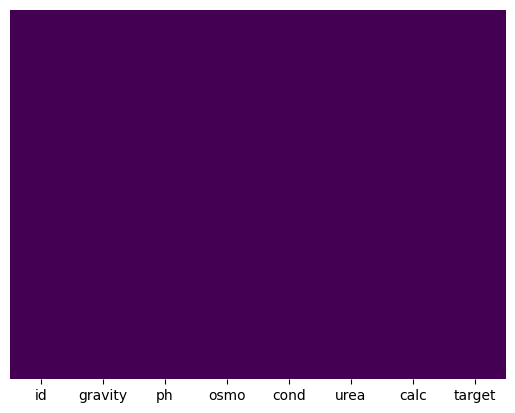

In [5]:
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
x = train_df.drop(['target','id'],axis = 1)
y =train_df['target']

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [8]:
log = LogisticRegression(max_iter=1000)

In [9]:
log.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [10]:
predict = log.predict(x_test)

In [11]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.75      0.84      0.79        67
           1       0.78      0.67      0.72        58

    accuracy                           0.76       125
   macro avg       0.76      0.75      0.76       125
weighted avg       0.76      0.76      0.76       125



In [12]:
# Try another predicting method

In [13]:
# I will defind x and y variable so i dont write again

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)

In [15]:
dtree = DecisionTreeClassifier()

In [16]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [17]:
predict_dtree = dtree.predict(x_test) 

In [18]:
print(classification_report(y_test,predict_dtree))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73        67
           1       0.69      0.69      0.69        58

    accuracy                           0.71       125
   macro avg       0.71      0.71      0.71       125
weighted avg       0.71      0.71      0.71       125



In [19]:
# Try RandomForest

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [21]:
rft = RandomForestClassifier()

In [22]:
rft.fit(x,y)

RandomForestClassifier()

In [23]:
predit_rft = rft.predict(x_test)

In [24]:
print(classification_report(y_test,predit_rft))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       1.00      1.00      1.00        58

    accuracy                           1.00       125
   macro avg       1.00      1.00      1.00       125
weighted avg       1.00      1.00      1.00       125



In [25]:
print(confusion_matrix(y_test,predit_rft))

[[67  0]
 [ 0 58]]


In [26]:
test_df = pd.read_csv("/kaggle/input/playground-series-s3e12/test.csv")

In [27]:
test_df.head()

,id,gravity,ph,osmo,cond,urea,calc
0,414,1.017,5.24,345,11.5,152,1.16
1,415,1.020,5.68,874,29.0,385,3.46
2,416,1.024,5.36,698,19.5,354,13.00
3,417,1.020,5.33,668,25.3,252,3.46
4,418,1.011,5.87,567,29.0,457,2.36


In [28]:
test_df.isnull().sum()

id         0
gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
dtype: int64

In [29]:
test_df.drop(['id'],axis = 1,inplace = True)

In [30]:
predict_test = rft.predict(test_df)

In [31]:
predict_test

array([0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0])

In [32]:
sub = pd.read_csv('/kaggle/input/playground-series-s3e12/sample_submission.csv')

In [33]:
sub

,id,target
0,414,0.5
1,415,0.5
2,416,0.5
3,417,0.5
4,418,0.5
...,...,...
271,685,0.5
272,686,0.5
273,687,0.5
274,688,0.5


In [34]:
sub['target'] = predict_test

In [35]:
sub

,id,target
0,414,0
1,415,1
2,416,1
3,417,1
4,418,0
...,...,...
271,685,1
272,686,0
273,687,1
274,688,0


In [36]:
sub.to_csv('submission.csv',index=False)

In [37]:
# use ths for 100% right prediction RandomForestClassifier